## 实际应用：利用直播数据对直播带货交易额进行预测

现在有数据：主播行业分类、主播日均粉丝数、主播日均点赞数、主播日均观看次数、直播日期、累计直播次数、直播观看次数、商品数、客单价、销量等10个自变量数据；销售额为因变量，为连续性变量。

研究的问题：利用以上10个自变量来预测销售额数据。

采取的办法：回归决策树及随机森林。

# 一、决策树

## 1、构建决策树预处理

In [2]:
# 引入包和函数

import numpy as np
import pandas as pd
import math

import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings  # 警告处理

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor  # 回归决策树模型
from sklearn.model_selection import train_test_split  # 数据分割

from sklearn.preprocessing import StandardScaler  # 数据归一化
from sklearn.decomposition import PCA  # 主成分分析（降维）
from sklearn.pipeline import Pipeline  # 管道（最优参数选择）
from sklearn.model_selection import GridSearchCV  # 网格搜索交叉验证，用于选择最优的参数

In [3]:
# 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False

In [4]:
# 1.数据引入
fd=pd.read_csv('chang.csv')
fd.head()

,Unnamed: 0,ID,category,lnfans,lnlikes,lnviewers_y,date,count,lnviewers_x,sum,customer_unit_price,lnsales,lnsales_value
0,0,868,2,13.493433,9.949342,11.521286,20211128,35,11.140295,37,106.34,5.998937,10.665566
1,1,803,6,11.984684,11.896345,11.606751,20211204,20,11.244955,101,398.92,4.043051,10.031810
2,2,1027,2,13.942902,11.084015,11.237665,20211225,22,11.370371,264,373.34,4.510860,10.433351
3,3,764,3,11.655657,11.554499,11.672464,20211209,35,11.475846,66,9446.19,6.122493,15.275859
4,4,1421,2,15.158773,10.087222,10.589280,20211207,6,11.521320,179,174.80,5.081404,10.245054


In [5]:
# 2.数据处理

#所有列都进入决策
fd=fd[['category','lnfans', 'lnlikes', 'lnviewers_y','date', 'count', 'lnviewers_x', 'sum', 'customer_unit_price', 'lnsales','lnsales_value']]
print(fd.columns) #获取特征名称

fd=fd.dropna(axis=0,how='any') #处理缺失值 将含有缺失值的行去掉
data = fd.values  #dataframe转换成一个array
data

Index(['category', 'lnfans', 'lnlikes', 'lnviewers_y', 'date', 'count',
       'lnviewers_x', 'sum', 'customer_unit_price', 'lnsales',
       'lnsales_value'],
      dtype='object')


array([[   2.        ,   13.49343302,    9.94934246, ...,  106.34      ,
           5.99893656,   10.6655657 ],
       [   6.        ,   11.9846838 ,   11.89634506, ...,  398.92      ,
           4.04305127,   10.0318104 ],
       [   2.        ,   13.94290239,   11.08401515, ...,  373.34      ,
           4.51085951,   10.43335081],
       ...,
       [   2.        ,   12.87575314,   10.56430245, ...,  124.11      ,
           5.60580207,   10.42695138],
       [   2.        ,   12.07537723,   11.05748724, ...,   30.58      ,
           5.64897424,    9.06919147],
       [   2.        ,   13.4453624 ,    9.59155699, ..., 1144.75      ,
           4.69134788,   11.73429144]])

In [6]:
# 3.划分数据
X, Y = np.split(data, (10,), axis=1)  # 前10个数据划为X，最后一个划为Y
# 将Y拉直为一个扁平的数组
Y = Y.ravel()
# 查看下数据
print(Y.shape)
print ("样本数据量:%d, 特征个数：%d" % X.shape)
print ("target样本数据量:%d" % Y.shape[0])

(14797,)
样本数据量:14797, 特征个数：10
target样本数据量:14797


In [7]:
# 4.数据分割

from sklearn.model_selection import train_test_split  # 数据分割

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=14)#random_state 储存随机数种子 使得得到的是同一个随机数
print ("训练数据集样本数目：%d, 测试数据集样本数目：%d" % (X_train.shape[0], X_test.shape[0]))


训练数据集样本数目：11837, 测试数据集样本数目：2960


## 2、不同深度max_depth对应的正确率

In [8]:
# 5、模型训构建，训练，评估

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor  # 回归决策树模型

depths = np.arange(1, 20)
err_list1 = []
err_list2 = []
for d in depths:
    clf = DecisionTreeRegressor(criterion='mse', max_depth=d)  # max_depth决策树深度
    clf.fit(X_train, Y_train)
    
    score1 = clf.score(X_test, Y_test)
    err1 = 1 - score1
    score2 = clf.score(X_train, Y_train)
    err2 = score2
    err_list1.append(err1)
    err_list2.append(err2)
    print ("%d深度，正确率%.5f，R-square:%.5f" % (d, score1,score2))

1深度，正确率0.33540，R-square:0.35057
2深度，正确率0.59226，R-square:0.61441
3深度，正确率0.73294，R-square:0.74994
4深度，正确率0.84290，R-square:0.85677
5深度，正确率0.91359，R-square:0.92440
6深度，正确率0.95259，R-square:0.96165
7深度，正确率0.97406，R-square:0.98045
8深度，正确率0.98397，R-square:0.99090
9深度，正确率0.99046，R-square:0.99570
10深度，正确率0.99319，R-square:0.99809
11深度，正确率0.99432，R-square:0.99916
12深度，正确率0.99473，R-square:0.99967
13深度，正确率0.99523，R-square:0.99988
14深度，正确率0.99504，R-square:0.99996
15深度，正确率0.99506，R-square:0.99999
16深度，正确率0.99510，R-square:1.00000
17深度，正确率0.99475，R-square:1.00000
18深度，正确率0.99498，R-square:1.00000
19深度，正确率0.99505，R-square:1.00000


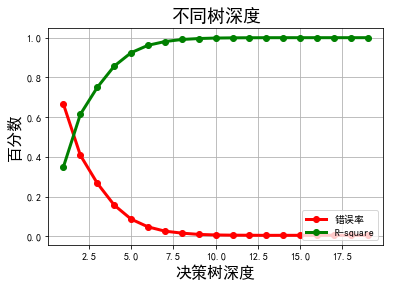

In [9]:
## 6、画图
plt.figure(facecolor='w')
plt.plot(depths, err_list1, 'ro-', lw=3,label=u'错误率')
plt.plot(depths, err_list2, 'go-', lw=3,label='R-square')
plt.xlabel(u'决策树深度', fontsize=16)
plt.ylabel(u'百分数', fontsize=16)
plt.legend(loc = 'lower right')
plt.grid(True)
plt.title(u'不同树深度', fontsize=18)
plt.show()

## 3、参数优化

In [10]:
from sklearn.preprocessing import StandardScaler  # 数据归一化
from sklearn.decomposition import PCA  # 主成分分析（降维）
from sklearn.pipeline import Pipeline  # 管道（最优参数选择）
from sklearn.model_selection import GridSearchCV  # 网格搜索交叉验证，用于选择最优的参数

# 1.设定参数
pipes = [
	Pipeline([
			('mms', StandardScaler()),  # 归一化处理
			('pca', PCA()),  # 降维
			('decision', DecisionTreeRegressor(criterion='mse'))  # 回归决策树模型，使用均方误差
		]),
	Pipeline([
			('mms', StandardScaler()),  # 归一化处理
			('decision', DecisionTreeRegressor(criterion='mse'))  # 回归决策树模型
		]),
	Pipeline([
			('decision', DecisionTreeRegressor(criterion='mse'))  # 回归决策树模型
		])
]
# 模型可用参数
parameters = [
	{
	"pca__n_components": [0.25, 0.5, 0.75, 1],
	"decision__max_depth": np.linspace(1, 20, 20).astype(np.int8)
	},
	{
	"decision__max_depth": np.linspace(1, 20, 20).astype(np.int8)
	},
	{
	"decision__max_depth": np.linspace(1, 20, 20).astype(np.int8)
	}
]
# 2.模型训练
for t in range(3):  # 遍历管道
    pipe = pipes[t]  # 选择管道
    gscv = GridSearchCV(pipe, param_grid=parameters[t])  # 构建模型
    gscv.fit(X_train, Y_train)  # 训练模型
    print (t,"score值:",gscv.best_score_,"最优参数列表:", gscv.best_params_)


0 score值: 0.7032136833770742 最优参数列表: {'decision__max_depth': 13, 'pca__n_components': 0.75}
1 score值: 0.9949152470867577 最优参数列表: {'decision__max_depth': 19}
2 score值: 0.9949983481587201 最优参数列表: {'decision__max_depth': 18}


## 4、建立不同深度决策树并计算R-square及正确率

In [14]:
# 1、作图
# 建立并训练模型
clf_0 = DecisionTreeRegressor(criterion='mse',max_depth=10)
clf_1 = DecisionTreeRegressor(criterion='mse',max_depth=11)
clf_2 = DecisionTreeRegressor(criterion='mse',max_depth=12)
clf_3 = DecisionTreeRegressor(criterion='mse',max_depth=13)
clf_4 = DecisionTreeRegressor(criterion='mse',max_depth=14)
# 训练模型
clf_0.fit(X_train, Y_train)
clf_1.fit(X_train, Y_train)
clf_2.fit(X_train, Y_train)
clf_3.fit(X_train, Y_train)
clf_4.fit(X_train, Y_train)
# 创建预测模拟数据
y_0 = np.exp(clf_0.predict(X_test))
y_1 =np.exp(clf_1.predict(X_test))
y_2 =np.exp(clf_2.predict(X_test))
y_3 =np.exp(clf_3.predict(X_test))
y_4 =np.exp(clf_4.predict(X_test))


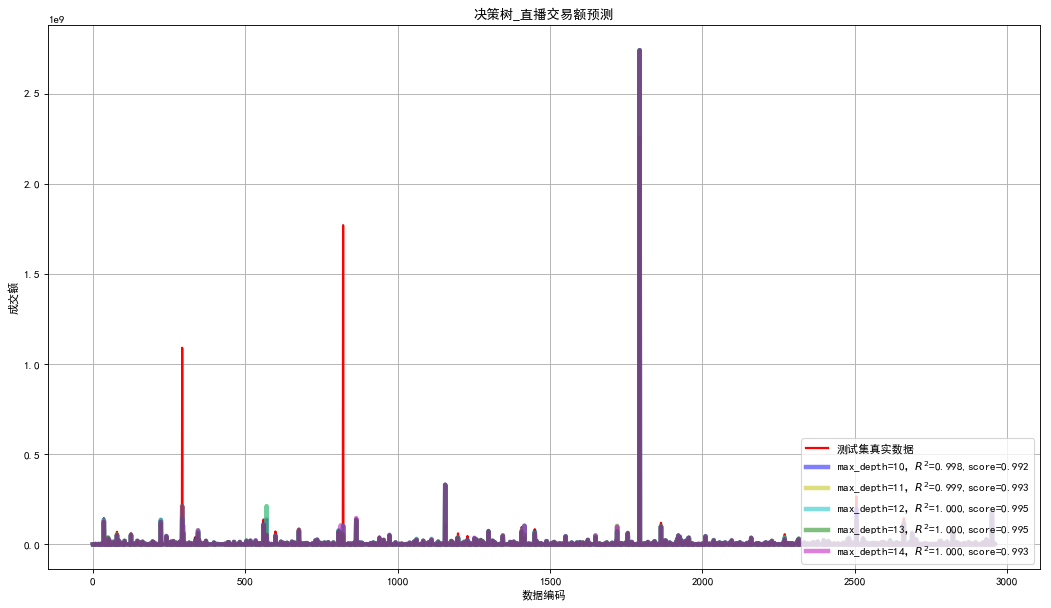

<Figure size 432x288 with 0 Axes>

In [15]:
#作图
plt.figure(figsize=(16,9),dpi=80,facecolor='w')

ln_x_test = range(len(X_test))
plt.plot(ln_x_test, np.exp(Y_test), 'r-', lw=2, label=u"测试集真实数据")

plt.plot(ln_x_test, y_0, 'b-', lw=4, label=u'max_depth=10，$R^2$=%.3f,score=%.3f' % (clf_0.score(X_train, Y_train),clf_0.score(X_test, Y_test)),alpha=0.5)
plt.plot(ln_x_test, y_1, 'y-', lw=4, label=u'max_depth=11，$R^2$=%.3f,score=%.3f' % (clf_1.score(X_train, Y_train),clf_1.score(X_test, Y_test)),alpha=0.5)
plt.plot(ln_x_test, y_2, 'c-', lw=4, label=u'max_depth=12，$R^2$=%.3f,score=%.3f' % (clf_2.score(X_train, Y_train),clf_2.score(X_test, Y_test)),alpha=0.5)
plt.plot(ln_x_test, y_3, 'g-', lw=4, label=u'max_depth=13，$R^2$=%.3f,score=%.3f' % (clf_3.score(X_train, Y_train),clf_3.score(X_test, Y_test)),alpha=0.5)
plt.plot(ln_x_test, y_4, 'm-', lw=4, label=u'max_depth=14，$R^2$=%.3f,score=%.3f' % (clf_4.score(X_train, Y_train),clf_4.score(X_test, Y_test)),alpha=0.5)

plt.xlabel(u'数据编码')
plt.ylabel(u'成交额')
plt.legend(loc = 'lower right')
plt.grid(True)
plt.title(u'决策树_直播交易额预测')
plt.show()
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

In [16]:
# 11.决策树可视化（导出决策树图）
import pydotplus
dot_data = tree.export_graphviz(clf_0, out_file=None,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_svg('tree.svg')

True

# 二、随机森林

In [17]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import warnings  # 警告处理

#from sklearn.linear_model.coordinate_descent import ConvergenceWarning  # 警告处理
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV  # 回归模型
from sklearn.tree import DecisionTreeRegressor  # 回归决策树模型
from sklearn.model_selection import train_test_split  # 数据分割
from sklearn.preprocessing import MinMaxScaler  # 数据归一化 (分类)
from sklearn.preprocessing import StandardScaler  # 数据归一化(回归)

from sklearn import tree
from sklearn.decomposition import PCA  # 主成分分析
from sklearn.pipeline import Pipeline  # 管道
from sklearn.model_selection import GridSearchCV  # 网格搜索交叉验证，用于选择最优的参数

from sklearn.preprocessing import label_binarize  # 数据二值化
from sklearn.decomposition import PCA  # 降维
from sklearn.ensemble import RandomForestClassifier  # 分类随机森林模型
from sklearn.ensemble import RandomForestRegressor  # 回归随机森林模型
from sklearn import metrics  # ROC/AUC

# 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False
# 拦截异常
#warnings.filterwarnings(action = 'ignore', category=ConvergenceWarning)

In [18]:
# 1.数据引入
fd=pd.read_csv('chang.csv')
#所有列都进入决策
fd=fd[['category','lnfans', 'lnlikes', 'lnviewers_y','date', 'count', 'lnviewers_x', 'sum', 'customer_unit_price', 'lnsales','lnsales_value']]
print(fd.columns) #获取特征名称

Index(['category', 'lnfans', 'lnlikes', 'lnviewers_y', 'date', 'count',
       'lnviewers_x', 'sum', 'customer_unit_price', 'lnsales',
       'lnsales_value'],
      dtype='object')


In [19]:
# 2.数据处理
fd=fd.dropna(axis=0,how='any')
data = fd.values
data

array([[   2.        ,   13.49343302,    9.94934246, ...,  106.34      ,
           5.99893656,   10.6655657 ],
       [   6.        ,   11.9846838 ,   11.89634506, ...,  398.92      ,
           4.04305127,   10.0318104 ],
       [   2.        ,   13.94290239,   11.08401515, ...,  373.34      ,
           4.51085951,   10.43335081],
       ...,
       [   2.        ,   12.87575314,   10.56430245, ...,  124.11      ,
           5.60580207,   10.42695138],
       [   2.        ,   12.07537723,   11.05748724, ...,   30.58      ,
           5.64897424,    9.06919147],
       [   2.        ,   13.4453624 ,    9.59155699, ..., 1144.75      ,
           4.69134788,   11.73429144]])

In [20]:
# 3.划分数据
#所有变量进入预测
names=['category', 'lnfans', 'lnlikes', 'lnviewers_y', 'date', 'count','lnviewers_x', 'sum', 'customer_unit_price', 'lnsales','lnsales_value']
labels = fd[names[-1:]] # 标签(真实值/预测变量 Y)
features= fd[names[0:-1]] # 特征值(解释变量 X)
#查看下数据
print ("样本数据量:%d, 特征个数：%d" % features.shape)
print ("target样本数据量:%d" % labels.shape[0])

样本数据量:14797, 特征个数：10
target样本数据量:14797


In [21]:
# 4.数据分割
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25,random_state = 42)
print('训练集特征:', train_features.shape)
print('训练集标签:', train_labels.shape)
print('测试集特征:', test_features.shape)
print('测试集标签:', test_labels.shape)

训练集特征: (11097, 10)
训练集标签: (11097, 1)
测试集特征: (3700, 10)
测试集标签: (3700, 1)


In [22]:
# 5.数据归一化(回归)
from sklearn.preprocessing import StandardScaler  # 数据归一化(回归)
ss = StandardScaler()  # 创建归一化模型
train_features = ss.fit_transform(train_features, train_labels)  # 训练模型并转换数据
test_features = ss.transform(test_features)  # 转换数据

In [24]:
# 6、不同深度的正确率及R方

depths = np.arange(1, 20)
err_list1 = []
err_list2 = []
for d in depths:
    clf = RandomForestRegressor(n_estimators= 1000, random_state=42,max_depth=d)  # max_depth决策树深度
    clf.fit(train_features, train_labels)
    
    score1 = clf.score(test_features, test_labels)
    err1 = 1 - score1
    score2 = clf.score(train_features, train_labels)
    err2 = score2
    err_list1.append(err1)
    err_list2.append(err2)
    print ("%d深度，正确率%.5f，R-square:%.5f" % (d, score1,score2))

D:\Anaconda_exe\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


1深度，正确率0.35013，R-square:0.36054


D:\Anaconda_exe\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


2深度，正确率0.62857，R-square:0.63681


D:\Anaconda_exe\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


3深度，正确率0.77734，R-square:0.77724


D:\Anaconda_exe\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


4深度，正确率0.88880，R-square:0.89399


D:\Anaconda_exe\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


5深度，正确率0.94889，R-square:0.95470


D:\Anaconda_exe\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


6深度，正确率0.97768，R-square:0.98276


D:\Anaconda_exe\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


7深度，正确率0.98992，R-square:0.99373


D:\Anaconda_exe\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


8深度，正确率0.99471，R-square:0.99786


D:\Anaconda_exe\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


9深度，正确率0.99621，R-square:0.99913


D:\Anaconda_exe\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


10深度，正确率0.99676，R-square:0.99957


D:\Anaconda_exe\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


11深度，正确率0.99692，R-square:0.99970


D:\Anaconda_exe\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


12深度，正确率0.99698，R-square:0.99976


D:\Anaconda_exe\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


13深度，正确率0.99701，R-square:0.99978


D:\Anaconda_exe\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


14深度，正确率0.99701，R-square:0.99979


D:\Anaconda_exe\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


15深度，正确率0.99702，R-square:0.99979


D:\Anaconda_exe\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


16深度，正确率0.99701，R-square:0.99979


D:\Anaconda_exe\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


17深度，正确率0.99702，R-square:0.99979


D:\Anaconda_exe\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


18深度，正确率0.99702，R-square:0.99979


D:\Anaconda_exe\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


19深度，正确率0.99701，R-square:0.99979


In [25]:
for d in depths:
    print ("%d深度，正确率%.5f，R-square:%.5f" % (d, 1-err_list1[d-1],err_list2[d-1]))

1深度，正确率0.35013，R-square:0.36054
2深度，正确率0.62857，R-square:0.63681
3深度，正确率0.77734，R-square:0.77724
4深度，正确率0.88880，R-square:0.89399
5深度，正确率0.94889，R-square:0.95470
6深度，正确率0.97768，R-square:0.98276
7深度，正确率0.98992，R-square:0.99373
8深度，正确率0.99471，R-square:0.99786
9深度，正确率0.99621，R-square:0.99913
10深度，正确率0.99676，R-square:0.99957
11深度，正确率0.99692，R-square:0.99970
12深度，正确率0.99698，R-square:0.99976
13深度，正确率0.99701，R-square:0.99978
14深度，正确率0.99701，R-square:0.99979
15深度，正确率0.99702，R-square:0.99979
16深度，正确率0.99701，R-square:0.99979
17深度，正确率0.99702，R-square:0.99979
18深度，正确率0.99702，R-square:0.99979
19深度，正确率0.99701，R-square:0.99979


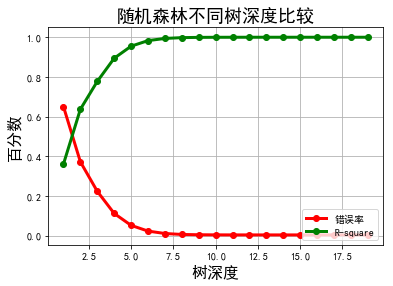

In [26]:
## 7、画图
plt.figure(facecolor='w')
plt.plot(depths, err_list1, 'ro-', lw=3,label=u'错误率')
plt.plot(depths, err_list2, 'go-', lw=3,label='R-square')
plt.xlabel(u'树深度', fontsize=16)
plt.ylabel(u'百分数', fontsize=16)
plt.legend(loc = 'lower right')
plt.grid(True)
plt.title(u'随机森林不同树深度比较', fontsize=18)
plt.show()

In [27]:
#8.修改max_depth

rf0 = RandomForestRegressor(n_estimators= 1000, random_state=42,max_depth=6)
rf0.fit(train_features, train_labels)
predictions0 = np.exp(rf0.predict(test_features))
rf1 = RandomForestRegressor(n_estimators= 1000, random_state=42,max_depth=7)
rf1.fit(train_features, train_labels)
predictions1 = np.exp(rf1.predict(test_features))
rf2 = RandomForestRegressor(n_estimators= 1000, random_state=42,max_depth=8)
rf2.fit(train_features, train_labels)
predictions2 = np.exp(rf2.predict(test_features))
rf3 = RandomForestRegressor(n_estimators= 1000, random_state=42,max_depth=9)
rf3.fit(train_features, train_labels)
predictions3 = np.exp(rf3.predict(test_features))
rf4 = RandomForestRegressor(n_estimators= 1000, random_state=42,max_depth=10)
rf4.fit(train_features, train_labels)
predictions4 = np.exp(rf4.predict(test_features))

D:\Anaconda_exe\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
D:\Anaconda_exe\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
D:\Anaconda_exe\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
D:\Anaconda_exe\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]
D:\Anaconda_exe\l

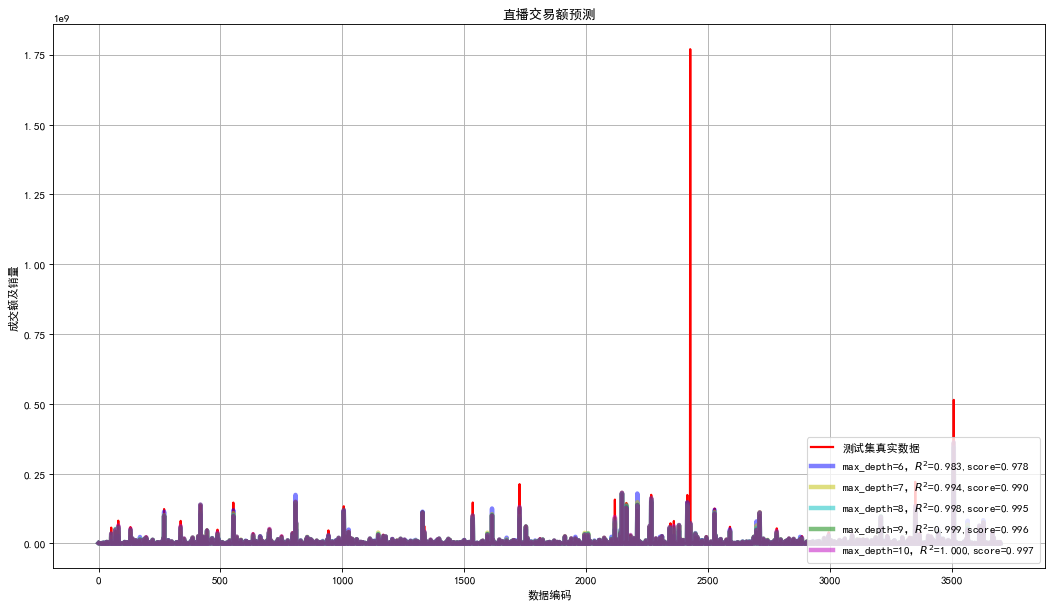

<Figure size 432x288 with 0 Axes>

In [28]:
# 9.画图
plt.figure(figsize=(16,9),dpi=80,facecolor='w')

ln_x_test = range(len(test_features))
plt.plot(ln_x_test, np.exp(test_labels), 'r-', lw=2, label=u"测试集真实数据")
plt.plot(ln_x_test, predictions0, 'b-', lw=4, label=u'max_depth=6，$R^2$=%.3f,score=%.3f' % (rf0.score(train_features, train_labels),rf0.score(test_features,test_labels)),alpha=0.5)
plt.plot(ln_x_test, predictions1, 'y-', lw=4, label=u'max_depth=7，$R^2$=%.3f,score=%.3f' % (rf1.score(train_features, train_labels),rf1.score(test_features,test_labels)),alpha=0.5)
plt.plot(ln_x_test, predictions2, 'c-', lw=4, label=u'max_depth=8，$R^2$=%.3f,score=%.3f' % (rf2.score(train_features, train_labels),rf2.score(test_features,test_labels)),alpha=0.5)
plt.plot(ln_x_test, predictions3, 'g-', lw=4, label=u'max_depth=9，$R^2$=%.3f,score=%.3f' % (rf3.score(train_features, train_labels),rf3.score(test_features,test_labels)),alpha=0.5)
plt.plot(ln_x_test, predictions4, 'm-', lw=4, label=u'max_depth=10，$R^2$=%.3f,score=%.3f' % (rf4.score(train_features, train_labels),rf4.score(test_features,test_labels)),alpha=0.5)
plt.xlabel(u'数据编码')
plt.ylabel(u'成交额及销量')
plt.legend(loc = 'lower right')
plt.grid(True)
plt.title(u'直播交易额预测')
plt.show()
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

In [30]:
# 10.可视化
from sklearn import tree
import pydotplus
k = 0
for clf in rf4.estimators_:
    dot_data = tree.export_graphviz(clf, out_file=None,  
                         filled=True, rounded=True,  
                         special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data)
    graph.write_svg("foress_tree_%d.svg" % k)
    k += 1
    if k == 5:  # 只可视化前5个决策树
        break

# 三、拓展
### 剪枝处理；
clf.cost_complexity_pruning_path(X, y) ：返回 CCP(Cost Complexity Pruning代价复杂度剪枝)法的剪枝路径。  

### 常用参数
class_weight  ：设置各类别样本的权重，默认是各个样本权重一样，都为 1.  
ccp_alpha    ：剪枝时的alpha系数，需要剪枝时设置该参数，默认值是不会剪枝的。  
random_state ：需要每次训练都一样时，就需要设置该参数。  
criterion      ：节点质量评估函数（gini,entropy） （看似常用，实际不常用。）  

#### 预防过拟合参数（为防过拟合，可以尝试调整以下参数）  
min_samples_leaf      ：叶子节点最小样本数。  
min_samples_split      ：节点分枝最小样本个数  
max_depth         ：树分枝的最大深度  
min_weight_fraction_leaf ：叶子节点最小权重和  
min_impurity_decrease  ：节点分枝最小纯度增长量  
max_leaf_nodes       ：最大叶子节点数  
 
#### 树的多样性参数（训练弱树常用以下参数）：
max_features：特征最大查找个数  
splitter      ：分枝时变量选择方式 

可参照：https://blog.csdn.net/ywj_1991/article/details/122962524?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522166755311016782388093984%2522%252C%2522scm%2522%253A%252220140713.130102334..%2522%257D&request_id=166755311016782388093984&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~sobaiduend~default-2-122962524-null-null.142^v63^control,201^v3^control_1,213^v1^t3_control2&utm_term=python%E5%86%B3%E7%AD%96%E6%A0%91%E5%8F%82%E6%95%B0&spm=1018.2226.3001.4187  